## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

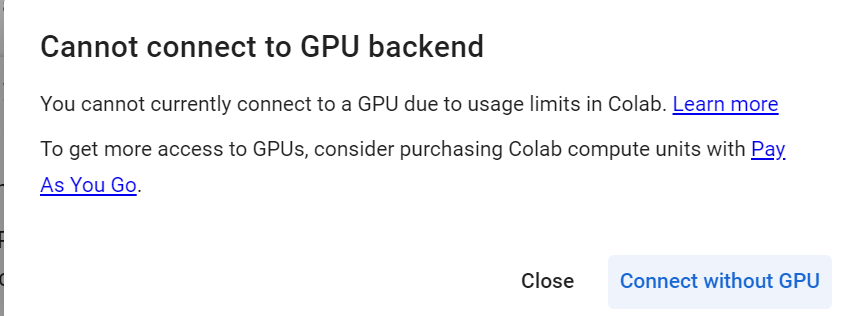

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 135.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 163.5 MB/s eta 0:00:00


In [2]:
# For installing the libraries & downloading models from HF Hub
#!pip install numpy==1.25.2 pandas==2.2.2 huggingface_hub==0.25.1 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1

!pip install numpy pandas huggingface_hub tiktoken pymupdf langchain langchain-community chromadb sentence-transformers

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.2 MB/s eta 0:00:00


In [1]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [2]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [3]:
model_path = hf_hub_download(
    repo_id=model_name_or_path, #mention the repo id
    filename=model_basename # mention the model name
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [4]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(model_path=model_path, n_ctx=1024, n_cores=-2)

### Response

In [5]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [6]:
response("What treatment options are available for managing hypertension?")


llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.44 ms /   128 runs   (    0.60 ms per token,  1653.00 tokens per second)
llama_print_timings: prompt eval time =     452.84 ms /    12 tokens (   37.74 ms per token,    26.50 tokens per second)
llama_print_timings:        eval time =    4101.85 ms /   127 runs   (   32.30 ms per token,    30.96 tokens per second)
llama_print_timings:       total time =    5036.25 ms /   139 tokens


'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [7]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     122.00 ms /   128 runs   (    0.95 ms per token,  1049.18 tokens per second)
llama_print_timings: prompt eval time =     310.96 ms /    14 tokens (   22.21 ms per token,    45.02 tokens per second)
llama_print_timings:        eval time =    4260.78 ms /   127 runs   (   33.55 ms per token,    29.81 tokens per second)
llama_print_timings:       total time =    5351.92 ms /   141 tokens


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize sepsis early by identifying signs and symptoms such as fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis. Use validated scoring systems such as the Sequential Organ Failure Assessment (SOFA) score or Quick Sequ'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [14]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #define the query #2
response(user_input_2) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      84.26 ms /   128 runs   (    0.66 ms per token,  1519.09 tokens per second)
llama_print_timings: prompt eval time =     194.79 ms /    33 tokens (    5.90 ms per token,   169.42 tokens per second)
llama_print_timings:        eval time =    4627.17 ms /   127 runs   (   36.43 ms per token,    27.45 tokens per second)
llama_print_timings:       total time =    5336.72 ms /   160 tokens


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small pouch-like structure that extends from the large intestine. The following are some common symptoms of appendicitis:\n\n1. Abdominal pain: The pain typically starts around the navel area and then shifts to the lower right side of the abdomen. The pain may be constant or come and go, and it may worsen with movement or pressure on the abdomen.\n2. Loss of appetite: People with appendicitis may lose their appetite due to abdominal pain or n'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [15]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #define the query #3
response(user_input_3) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.73 ms /   128 runs   (    0.61 ms per token,  1646.64 tokens per second)
llama_print_timings: prompt eval time =     196.07 ms /    34 tokens (    5.77 ms per token,   173.40 tokens per second)
llama_print_timings:        eval time =    4882.18 ms /   127 runs   (   38.44 ms per token,    26.01 tokens per second)
llama_print_timings:       total time =    5510.45 ms /   161 tokens


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not fully understood, but it's believed to be related to an abnormal immune response that attacks the hair follicles. Some possible triggers for this condition include stress, genetics, viral"

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [16]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" # define the query #4
response(user_input_4) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      71.92 ms /   128 runs   (    0.56 ms per token,  1779.66 tokens per second)
llama_print_timings: prompt eval time =     457.12 ms /    28 tokens (   16.33 ms per token,    61.25 tokens per second)
llama_print_timings:        eval time =    4888.95 ms /   127 runs   (   38.50 ms per token,    25.98 tokens per second)
llama_print_timings:       total time =    5776.40 ms /   155 tokens


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments that may be recommended:\n\n1. Emergency care: In case of a severe TBI, the first priority is to provide emergency care to stabilize the patient's condition and prevent further damage. This may include administering oxygen, controlling bleeding, and managing pressure within the skull.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [17]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #define the query #5
response(user_input_5) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      74.99 ms /   128 runs   (    0.59 ms per token,  1706.87 tokens per second)
llama_print_timings: prompt eval time =     196.36 ms /    35 tokens (    5.61 ms per token,   178.24 tokens per second)
llama_print_timings:        eval time =    5039.50 ms /   127 runs   (   39.68 ms per token,    25.20 tokens per second)
llama_print_timings:       total time =    5666.92 ms /   162 tokens


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm: Encourage them to remain still to prevent any movement that could cause more pain or damage.\n2. Assess the injury: Check for signs of open wounds, swelling, deformity, or numbness. Do not attempt to realign or manipulate the bone.\n3. Provide first aid: Apply a sterile dressing to any open wounds and imm"

## Question Answering using LLM with Prompt Engineering

In [18]:
system_prompt = "You are a helpful and informative medical assistant. Answer the following questions to the best of your ability, providing detailed and comprehensive responses where possible.  Prioritize accuracy and clarity in your answers.  If you are unsure about an answer, state that you don't have enough information to provide a definitive response, rather than guessing." # define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [19]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      87.52 ms /   128 runs   (    0.68 ms per token,  1462.49 tokens per second)
llama_print_timings: prompt eval time =     211.86 ms /    86 tokens (    2.46 ms per token,   405.92 tokens per second)
llama_print_timings:        eval time =    4773.77 ms /   127 runs   (   37.59 ms per token,    26.60 tokens per second)
llama_print_timings:       total time =    5543.33 ms /   213 tokens


"\nSepsis is a life-threatening condition caused by the body's response to infection. In a critical care unit, managing sepsis requires a multidisciplinary approach involving intensive care specialists, infectious disease specialists, pharmacists, nurses, and respiratory therapists. The protocol for managing sepsis in a critical care unit typically includes the following steps:\n1. Early recognition and diagnosis: Identify sepsis early by recognizing signs and symptoms such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered"

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [20]:
user_input2 = system_prompt+"\n"+ "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #  pass the query #2
response(user_input2) # pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      79.20 ms /   128 runs   (    0.62 ms per token,  1616.18 tokens per second)
llama_print_timings: prompt eval time =     545.75 ms /    32 tokens (   17.05 ms per token,    58.64 tokens per second)
llama_print_timings:        eval time =    5122.82 ms /   127 runs   (   40.34 ms per token,    24.79 tokens per second)
llama_print_timings:       total time =    6121.07 ms /   159 tokens


'\n\nAppendicitis is a common inflammatory condition of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right side of the abdomen and may be constant or come and go. It may be mild at first but can become severe over time.\n2. Loss of appetite: People with appendicitis may lose their appetite due to abdominal pain or feeling nauseous'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [21]:
user_input3 = system_prompt+"\n"+ "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #  pass the query #3
response(user_input3) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      82.33 ms /   128 runs   (    0.64 ms per token,  1554.70 tokens per second)
llama_print_timings: prompt eval time =     190.35 ms /    34 tokens (    5.60 ms per token,   178.61 tokens per second)
llama_print_timings:        eval time =    5266.65 ms /   127 runs   (   41.47 ms per token,    24.11 tokens per second)
llama_print_timings:       total time =    5940.39 ms /   161 tokens


'\n\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder that causes hair loss in small patches on the scalp or other areas of the body. The exact cause of alopecia areata is not known, but it is believed to be related to a problem with the immune system.\n\nThere is no cure for alopecia areata, but there are several treatments that can help stimulate hair growth and improve the appearance of bald spots. Some of the most common treatments include:\n\n1. Corticosteroids: These medications can be'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [22]:
user_input4 = system_prompt+"\n"+ "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" # pass the query #4
response(user_input4) #pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      78.38 ms /   128 runs   (    0.61 ms per token,  1633.05 tokens per second)
llama_print_timings: prompt eval time =     494.69 ms /    28 tokens (   17.67 ms per token,    56.60 tokens per second)
llama_print_timings:        eval time =    5461.90 ms /   127 runs   (   43.01 ms per token,    23.25 tokens per second)
llama_print_timings:       total time =    6390.87 ms /   155 tokens


'\n\nA person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function, is referred to as having a brain injury. The treatment for a brain injury depends on the severity and location of the injury, as well as the specific symptoms experienced by the individual. Here are some common treatments for brain injuries:\n\n1. Medical Management: The first step in treating a brain injury is to ensure that the person receives appropriate medical care. This may include hospitalization, surgery, or other interventions to address any life-threatening conditions or complications.\n2. Rehabil'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [23]:
user_input5 = system_prompt+"\n"+ "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" # pass the query #5
response(user_input5) # pass the user input

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.78 ms /   128 runs   (    0.61 ms per token,  1645.58 tokens per second)
llama_print_timings: prompt eval time =     197.97 ms /    35 tokens (    5.66 ms per token,   176.79 tokens per second)
llama_print_timings:        eval time =    5711.98 ms /   127 runs   (   44.98 ms per token,    22.23 tokens per second)
llama_print_timings:       total time =    6343.31 ms /   162 tokens


'\n\nA leg fracture, especially one sustained during a hiking trip, can be a serious injury that requires prompt attention and proper care. Here are some necessary precautions and treatment steps for a person who has fractured their leg:\n\n1. Assess the severity of the injury: Before providing any treatment, assess the severity of the fracture. Check for signs of open wounds, deformity, swelling, numbness, or discoloration. If the fracture is open or the person is experiencing severe pain, difficulty breathing, or signs of shock, call for emergency medical assistance immediately.'

## Data Preparation for RAG

In [24]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
manual_pdf_path = "/content/drive/MyDrive/medical_diagnosis_manual.pdf" #Complete the path to define the file name

In [27]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [28]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [29]:
# check the first 5 pages of the pdf
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
soumyajit.s@gmail.com
F5IUQNS374
eant for personal use by soumyajit.s@gm
shing the contents in part or full is liable
Page Number : 2
soumyajit.s@gmail.com
F5IUQNS374
This file is meant for personal use by soumyajit.s@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.
Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ...........................................................................................................................................................................................


#### Checking the number of pages

In [30]:
len(manual)

4114

### Data Chunking

In [31]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=500, #define the chunk size
    chunk_overlap=50 #define the chunk overlap
)

In [32]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [33]:
len(document_chunks)

8883

In [34]:
document_chunks[0].page_content

'soumyajit.s@gmail.com\nF5IUQNS374\neant for personal use by soumyajit.s@gm\nshing the contents in part or full is liable'

In [35]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [36]:
document_chunks[3].page_content

"275\nChapter 23. Approach to the Patient With Liver Disease    ...........................................................................................\n294\nChapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ....................................................................................................................................\n314\nChapter 27. Fibrosis & Cirrhosis    ............................................................................................................................................\n322\nChapter 28. Hepatitis    ........................................................................................................

As expected, there are some overlaps

In [37]:
!pip install --upgrade torchvision torchaudio torchtext --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/9

### Embedding

In [38]:
# define the model name

#embedding_model = SentenceTransformerEmbeddings(model_name="all-mpnet-base-v2")
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')


<ipython-input-38-e97340a45741>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [39]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [40]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  1024


True

In [41]:
embedding_1,embedding_2

([-0.03049587272107601,
  -0.005787272471934557,
  -0.005804830230772495,
  0.00589599646627903,
  -0.021590810269117355,
  -0.04514406621456146,
  -0.005688168108463287,
  0.03491494432091713,
  0.0067991637624800205,
  0.012898186221718788,
  0.019617339596152306,
  -0.005411545280367136,
  0.013084820471704006,
  -0.040277063846588135,
  0.002023987704887986,
  -0.0017849213909357786,
  -0.0010034042643383145,
  -0.03183535486459732,
  0.003234969452023506,
  0.001004692050628364,
  0.012237979099154472,
  -0.000587466056458652,
  -0.08549030125141144,
  -0.04063935950398445,
  0.003909471910446882,
  0.020855829119682312,
  0.0141252176836133,
  -0.0005871141911484301,
  0.06911375373601913,
  0.03421391546726227,
  -0.01705116033554077,
  0.0007966373232193291,
  0.032523442059755325,
  -0.048340581357479095,
  -0.01667899452149868,
  -0.0030546667985618114,
  0.048503682017326355,
  -0.028971074149012566,
  -0.022210435941815376,
  -0.039645977318286896,
  -0.005391315557062626,


### Vector Database

In [42]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [43]:
vectorstore = Chroma.from_documents(
    document_chunks, #pass the document chunks
    embedding_model, #pass the embedding model
    persist_directory=out_dir
)

In [44]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

<ipython-input-44-c6363b6e8655>:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)


In [45]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [46]:
# pass a query and an appropriate k value
vectorstore.similarity_search("What is the protocol for managing sepsis in a critical care unit?",k=3) # pass a query and an appropriate k value


[Document(metadata={'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creator': 'Atop CHM to PDF Converter', 'author': '', 'moddate': '2025-03-25T00:11:19+00:00', 'page': 2455, 'creationDate': 'D:20120615054440Z', 'subject': '', 'trapped': '', 'creationdate': '2012-06-15T05:44:40+00:00', 'total_pages': 4114, 'keywords': '', 'source': '/content/drive/MyDrive/medical_diagnosis_manual.pdf', 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition', 'file_path': '/content/drive/MyDrive/medical_diagnosis_manual.pdf', 'modDate': 'D:20250325001119Z', 'format': 'PDF 1.7'}, page_content='• Normalization of blood glucose levels\n• Replacement-dose corticosteroids\nPatients with septic shock should be treated in an ICU. The following should be monitored frequently (see\nalso p. 2244): systemic pressure; CVP, PAOP, or both; pulse oximetry; ABGs; blood glucose, lactate, and\nelectrolyte levels; renal function, and possibly sublingual PCO2. Urine output, a good indicator of renal\n

### Retriever

In [47]:
# pass an appropriate k value
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3} # pass an appropriate k value
)


In [48]:
# pass the query
rel_docs = retriever.get_relevant_documents("What is the protocol for managing sepsis in a critical care unit?")
rel_docs


<ipython-input-48-c9fef08db267>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rel_docs = retriever.get_relevant_documents("What is the protocol for managing sepsis in a critical care unit?")


[Document(metadata={'moddate': '2025-03-25T00:11:19+00:00', 'file_path': '/content/drive/MyDrive/medical_diagnosis_manual.pdf', 'total_pages': 4114, 'page': 2455, 'subject': '', 'source': '/content/drive/MyDrive/medical_diagnosis_manual.pdf', 'creationdate': '2012-06-15T05:44:40+00:00', 'creationDate': 'D:20120615054440Z', 'trapped': '', 'author': '', 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition', 'modDate': 'D:20250325001119Z', 'keywords': '', 'format': 'PDF 1.7', 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creator': 'Atop CHM to PDF Converter'}, page_content='• Normalization of blood glucose levels\n• Replacement-dose corticosteroids\nPatients with septic shock should be treated in an ICU. The following should be monitored frequently (see\nalso p. 2244): systemic pressure; CVP, PAOP, or both; pulse oximetry; ABGs; blood glucose, lactate, and\nelectrolyte levels; renal function, and possibly sublingual PCO2. Urine output, a good indicator of renal\n

In [49]:
model_output = llm(
    "What is the protocol for managing sepsis in a critical care unit?",
    max_tokens=300,
    temperature=0.7
)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     194.40 ms /   300 runs   (    0.65 ms per token,  1543.23 tokens per second)
llama_print_timings: prompt eval time =     334.23 ms /    15 tokens (   22.28 ms per token,    44.88 tokens per second)
llama_print_timings:        eval time =   11304.72 ms /   299 runs   (   37.81 ms per token,    26.45 tokens per second)
llama_print_timings:       total time =   12963.47 ms /   314 tokens


In [50]:
model_output['choices'][0]['text']

'\n\nSepsis is a life-threatening condition that can arise from an infection, and prompt recognition and management are crucial for improving outcomes. In a critical care unit, the following steps should be taken for managing sepsis:\n\n1. Early recognition: Identify patients who may have sepsis based on clinical suspicion and use validated scoring systems such as Sequential Organ Failure Assessment (SOFA) or Quick Sequential Organ Failure Assessment (qSOFA) to help diagnose sepsis.\n2. Early goal-directed therapy: Initiate resuscitation with intravenous fluids to achieve a target mean arterial pressure (MAP) of 65 mm Hg or higher and central venous oxygen saturation (ScvO2) of 70% or higher. Consider early administration of broad-spectrum antibiotics based on culture results and suspected source of infection.\n3. Source control: Identify and address the source of infection as soon as possible through appropriate interventions such as debridement, drainage, or surgery.\n4. Vasopressor 

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [51]:
#Define the system message
qna_system_message = "You are a knowledgeable medical assistant. Answer questions accurately and concisely based on the provided context."

In [52]:
# User message template: where we plug in the context and the actual question
qna_user_message_template = """
Conider the following ###Context and ###Question
###Context
{context}

###Question
{question}
"""

### Response Function

In [53]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [54]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.46 ms /   128 runs   (    0.61 ms per token,  1652.44 tokens per second)
llama_print_timings: prompt eval time =    2497.52 ms /  1751 tokens (    1.43 ms per token,   701.10 tokens per second)
llama_print_timings:        eval time =    5748.79 ms /   127 runs   (   45.27 ms per token,    22.09 tokens per second)
llama_print_timings:       total time =    8749.93 ms /  1878 tokens


'The protocol for managing sepsis in a critical care unit includes the following steps:\n1. Admission to an ICU: Patients with sepsis or septic shock should be admitted to an ICU for close monitoring and intensive care.\n2. Fluid resuscitation: Patients should be given fluid resuscitation to maintain adequate intravascular volume, as indicated by CVP or PAOP measurements. Oliguria is not a contraindication to vigorous fluid resuscitation.\n3. Vasopressors: If hypotension persists despite adequate fluid resuscitation,'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [55]:
# Pass the user input
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"

# Call the RAG (Retrieval-Augmented Generation) function
generate_rag_response(user_input_2,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      78.89 ms /   128 runs   (    0.62 ms per token,  1622.59 tokens per second)
llama_print_timings: prompt eval time =    1895.17 ms /  1515 tokens (    1.25 ms per token,   799.40 tokens per second)
llama_print_timings:        eval time =    5967.59 ms /   127 runs   (   46.99 ms per token,    21.28 tokens per second)
llama_print_timings:       total time =    8363.70 ms /  1642 tokens


'The common symptoms for appendicitis include abdominal pain, anorexia, and abdominal tenderness. The diagnosis for appendicitis is clinical, often supplemented by CT or ultrasound. Appendicitis cannot be cured via medicine alone, and the treatment involves surgical removal, either through an open or laparoscopic appendectomy. If the appendix is perforated, antibiotics should be administered to prevent complications. In cases where surgery is impossible, antibiotics can improve survival rate but are not curative. If a large inflammatory mass is'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [56]:
# Store the query (Query 3)
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"

# Pass the query into your RAG pipeline
generate_rag_response(user_input_3,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      82.13 ms /   128 runs   (    0.64 ms per token,  1558.54 tokens per second)
llama_print_timings: prompt eval time =    2152.37 ms /  1623 tokens (    1.33 ms per token,   754.05 tokens per second)
llama_print_timings:        eval time =    5788.14 ms /   127 runs   (   45.58 ms per token,    21.94 tokens per second)
llama_print_timings:       total time =    8500.13 ms /  1750 tokens


'Sudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder that affects genetically susceptible individuals exposed to unclear environmental triggers. The most common areas affected are the scalp and beard, but any hairy area can be involved. The condition can range from small patches to complete loss of hair (alopecia universalis).\n\nThe diagnosis of alopecia areata is typically made through microscopic hair examination or scalp biopsy, as it can mimic other conditions such as lichen planopilaris, lupus'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [57]:
# Store the query (Query 4)
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"

# Pass the query into your RAG pipeline
generate_rag_response(user_input_4,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      87.09 ms /   128 runs   (    0.68 ms per token,  1469.69 tokens per second)
llama_print_timings: prompt eval time =    1733.53 ms /  1406 tokens (    1.23 ms per token,   811.06 tokens per second)
llama_print_timings:        eval time =    5332.88 ms /   127 runs   (   41.99 ms per token,    23.81 tokens per second)
llama_print_timings:       total time =    7746.87 ms /  1533 tokens


'Based on the context provided, the recommended treatments for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function, include ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure in the initial days after the injury. Surgery may be needed in patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas. In the first few days after the injury, maintaining adequate brain perfusion and oxygenation and preventing'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [58]:
# Store the query (Query 5)
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"

# Pass the query into your RAG pipeline
generate_rag_response(user_input_5,top_k=20)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      85.09 ms /   128 runs   (    0.66 ms per token,  1504.36 tokens per second)
llama_print_timings: prompt eval time =    1548.10 ms /  1248 tokens (    1.24 ms per token,   806.15 tokens per second)
llama_print_timings:        eval time =    5269.89 ms /   127 runs   (   41.50 ms per token,    24.10 tokens per second)
llama_print_timings:       total time =    7430.34 ms /  1375 tokens


'Based on the context provided, if a person has fractured their leg during a hiking trip, they should seek immediate medical care. In the meantime, they can take measures to manage their pain with analgesics and apply ice to reduce swelling. If the fracture is suspected to be unstable or of a long bone, it is important to immobilize the affected leg with a splint to prevent further injury. Suspected open fractures require sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics to prevent infection. It is crucial to monitor for signs of'

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [59]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.5)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.76 ms /   128 runs   (    0.61 ms per token,  1646.07 tokens per second)
llama_print_timings: prompt eval time =    2145.08 ms /  1715 tokens (    1.25 ms per token,   799.51 tokens per second)
llama_print_timings:        eval time =    5480.01 ms /   127 runs   (   43.15 ms per token,    23.18 tokens per second)
llama_print_timings:       total time =    8136.65 ms /  1842 tokens


'The protocol for managing sepsis in a critical care unit involves several steps:\n1. Treatment in an ICU: Patients with sepsis or septic shock should be treated in an ICU due to their critical condition. Monitoring should include systemic pressure, CVP, PAOP, pulse oximetry, ABGs, blood glucose, lactate, electrolyte levels, renal function, urine output, and possibly sublingual PCO2.\n2. Fluid resuscitation: Fluid resuscitation with 0.9% saline should be given'

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [60]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,temperature=0.5) #pass the user input along with the parameters

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      77.98 ms /   128 runs   (    0.61 ms per token,  1641.49 tokens per second)
llama_print_timings: prompt eval time =    1765.79 ms /  1515 tokens (    1.17 ms per token,   857.97 tokens per second)
llama_print_timings:        eval time =    5540.04 ms /   127 runs   (   43.62 ms per token,    22.92 tokens per second)
llama_print_timings:       total time =    7799.78 ms /  1642 tokens


'Appendicitis is characterized by symptoms such as abdominal pain, anorexia (loss of appetite), and abdominal tenderness, particularly in the lower right quadrant of the abdomen. The diagnosis is typically clinical, but imaging techniques like CT or ultrasound can be used for confirmation. Appendicitis cannot be cured via medicine alone as it requires surgical removal of the inflamed appendix to prevent complications like perforation and peritonitis. The standard surgical procedure for treating appendicitis is an appendectomy, which can be performed either through an open incision'

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [61]:
user_input_3 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #3
generate_rag_response(user_input_3,temperature=0.5) # pass the user input along with the parameters

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      93.84 ms /   128 runs   (    0.73 ms per token,  1363.95 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    5322.74 ms /   128 runs   (   41.58 ms per token,    24.05 tokens per second)
llama_print_timings:       total time =    5979.84 ms /   129 tokens


'The common symptoms for appendicitis include abdominal pain, anorexia, and abdominal tenderness. The diagnosis for appendicitis is clinical, often supplemented by CT or ultrasound. Appendicitis cannot be cured via medicine alone, as it requires surgical removal. The surgical procedure for treating appendicitis is either an open or laparoscopic appendectomy. The surgeon can usually remove the appendix even if perforated, but if the appendix is difficult to locate, it usually lies behind the cecum or the ileum and mesentery'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [62]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_4,temperature=0.5) # pass the user input along with the parameters

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      76.42 ms /   128 runs   (    0.60 ms per token,  1674.87 tokens per second)
llama_print_timings: prompt eval time =    1695.11 ms /  1406 tokens (    1.21 ms per token,   829.45 tokens per second)
llama_print_timings:        eval time =    5596.54 ms /   127 runs   (   44.07 ms per token,    22.69 tokens per second)
llama_print_timings:       total time =    7816.73 ms /  1533 tokens


'###Answer\nBased on the context you have provided from The Merck Manual of Diagnosis & Therapy, 19th Edition, Chapter 324. Traumatic Brain Injury, the recommended treatments for a person who has sustained a physical injury to brain tissue include ensuring a reliable airway, maintaining adequate ventilation, oxygenation, and blood pressure, and surgery if necessary to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas. In the first few days after'

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [63]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_5,temperature=0.5) # pass the user input along with the parameters

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      78.73 ms /   128 runs   (    0.62 ms per token,  1625.85 tokens per second)
llama_print_timings: prompt eval time =    1528.45 ms /  1248 tokens (    1.22 ms per token,   816.51 tokens per second)
llama_print_timings:        eval time =    5602.03 ms /   127 runs   (   44.11 ms per token,    22.67 tokens per second)
llama_print_timings:       total time =    7640.59 ms /  1375 tokens


'Based on the context provided, if a person has fractured their leg during a hiking trip, they should seek immediate medical care. In the meantime, they can be given analgesics to manage pain. For suspected unstable fractures or fractures of long bones, splinting is necessary to prevent further injury and provide some support. However, if the fracture is open, sterile wound dressings, tetanus prophylaxis, and broad-spectrum antibiotics should be administered to prevent infection. If there is an odor from within the cast or a fever develops, medical attention'

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [64]:
groundedness_rater_system_message = (
    "You are a strict evaluator judging how well an answer is grounded in the given context. "
    "Your task is to determine whether the answer strictly uses information from the context provided, "
    "without introducing hallucinated or unverified facts. Rate groundedness on a scale from 1 (poor) to 5 (excellent)."
)


In [65]:
relevance_rater_system_message = (
    "You are an expert evaluator checking the relevance of retrieved documents. "
    "Your task is to assess how well the retrieved context matches the question. "
    "Rate relevance on a scale from 1 (irrelevant) to 5 (highly relevant and helpful)."
)

In [66]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [67]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [68]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     236.45 ms /   370 runs   (    0.64 ms per token,  1564.79 tokens per second)
llama_print_timings: prompt eval time =    2151.95 ms /  1767 tokens (    1.22 ms per token,   821.12 tokens per second)
llama_print_timings:        eval time =   16279.12 ms /   369 runs   (   44.12 ms per token,    22.67 tokens per second)
llama_print_timings:       total time =   20200.21 ms /  2136 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      31.79 ms /    40 runs   (    0.79 ms per token,  1258.42 tokens per second)
llama_print_timings: prompt eval time =    2826.30 ms /  2176 tokens (    1.30 ms per token,   769.91 tokens per second)
llama_print_timings:        eval time =    1758.15 ms /    39 runs   (   45.08 ms per token,    22.18 tokens per second)
llama_print_timings:       to

 I would rate the answer as excellent. The response strictly uses information from the context provided and accurately summarizes the protocol for managing sepsis in a critical care unit as outlined in the text.

 Based on the provided context, I would rate the relevance as 5 (highly relevant and helpful). The context discusses in detail the protocol for managing sepsis in a critical care unit, covering various aspects such as monitoring, fluid resuscitation, oxygen administration, nutrition, and antibiotic therapy. The information provided aligns closely with the user's question, making it highly relevant.


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [69]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens=370) # pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      74.53 ms /    99 runs   (    0.75 ms per token,  1328.40 tokens per second)
llama_print_timings: prompt eval time =    2201.87 ms /  1562 tokens (    1.41 ms per token,   709.40 tokens per second)
llama_print_timings:        eval time =    3686.42 ms /    98 runs   (   37.62 ms per token,    26.58 tokens per second)
llama_print_timings:       total time =    6473.86 ms /  1660 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      47.20 ms /    75 runs   (    0.63 ms per token,  1588.88 tokens per second)
llama_print_timings: prompt eval time =    2093.96 ms /  1704 tokens (    1.23 ms per token,   813.77 tokens per second)
llama_print_timings:        eval time =    3185.92 ms /    74 runs   (   43.05 ms per token,    23.23 tokens per second)
llama_print_timings:       to

 I would rate the answer as excellent. The user strictly used information from the context to answer the question about the symptoms and treatment of appendicitis. They correctly identified that appendicitis cannot be cured with medicine alone and that surgical removal is required. The user also accurately described the common symptoms and the type of surgical procedures used to treat appendicitis.

 Based on the provided context, I would rate the relevance as 5 (highly relevant and helpful). The context clearly explains the common symptoms for appendicitis, which includes abdominal pain, anorexia, and abdominal tenderness, typically located in the right lower quadrant of the abdomen. It also confirms that appendicitis cannot be cured via medicine alone, and that surgical removal of the appendix is required. The context also provides information about the surgical procedures used to treat appendicitis, which further supports its relevance to the question.


### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [70]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=370) # pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     316.87 ms /   365 runs   (    0.87 ms per token,  1151.89 tokens per second)
llama_print_timings: prompt eval time =    2180.84 ms /  1669 tokens (    1.31 ms per token,   765.30 tokens per second)
llama_print_timings:        eval time =   16292.74 ms /   364 runs   (   44.76 ms per token,    22.34 tokens per second)
llama_print_timings:       total time =   20989.73 ms /  2033 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      68.82 ms /    86 runs   (    0.80 ms per token,  1249.62 tokens per second)
llama_print_timings: prompt eval time =    3061.62 ms /  2077 tokens (    1.47 ms per token,   678.40 tokens per second)
llama_print_timings:        eval time =    3592.36 ms /    85 runs   (   42.26 ms per token,    23.66 tokens per second)
llama_print_timings:       to

 I would rate the answer as excellent. The answer strictly uses information from the context provided and does not introduce any hallucinated or unverified facts. The answer correctly identifies alopecia areata as a cause of sudden patchy hair loss and lists the effective treatments for it based on the information provided in the context. The possible causes mentioned in the answer are also consistent with the information given in the context.

 Based on the provided context, I would rate the relevance as 5 (highly relevant and helpful). The context discusses various causes and treatments for different types of hair loss, including alopecia areata, which is the type of hair loss described in the question. The text provides detailed information about the treatments for alopecia areata, including topical corticosteroids, oral corticosteroids, immunosuppressants, minoxidil, and hair transplant, which directly answers the question.


### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [71]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=370) # pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     135.57 ms /   207 runs   (    0.65 ms per token,  1526.85 tokens per second)
llama_print_timings: prompt eval time =    1743.29 ms /  1452 tokens (    1.20 ms per token,   832.91 tokens per second)
llama_print_timings:        eval time =    8363.22 ms /   206 runs   (   40.60 ms per token,    24.63 tokens per second)
llama_print_timings:       total time =   11091.01 ms /  1658 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      49.42 ms /    80 runs   (    0.62 ms per token,  1618.65 tokens per second)
llama_print_timings: prompt eval time =    2102.67 ms /  1702 tokens (    1.24 ms per token,   809.45 tokens per second)
llama_print_timings:        eval time =    3399.75 ms /    79 runs   (   43.03 ms per token,    23.24 tokens per second)
llama_print_timings:       to

 I would rate the answer as excellent. The answer strictly uses information from the context provided by the Merck Manual to answer the question about treatments for a person with a brain injury. The answer accurately summarizes the recommendations for rehabilitation and the importance of early intervention by rehabilitation specialists for maximal functional recovery. The answer does not introduce any hallucinated or unverified facts.

 Based on the provided context, I would rate the relevance as 5 (highly relevant and helpful). The context clearly discusses the importance of rehabilitation for individuals who have sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. It also provides details about the types of therapy and interventions that may be necessary for these individuals, as well as the importance of early intervention by rehabilitation specialists for maximal functional recovery.


### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [72]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=370) # pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =     250.89 ms /   347 runs   (    0.72 ms per token,  1383.09 tokens per second)
llama_print_timings: prompt eval time =    1590.76 ms /  1294 tokens (    1.23 ms per token,   813.45 tokens per second)
llama_print_timings:        eval time =   14993.00 ms /   346 runs   (   43.33 ms per token,    23.08 tokens per second)
llama_print_timings:       total time =   18459.64 ms /  1640 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     453.19 ms
llama_print_timings:      sample time =      56.85 ms /    73 runs   (    0.78 ms per token,  1284.04 tokens per second)
llama_print_timings: prompt eval time =    2176.56 ms /  1684 tokens (    1.29 ms per token,   773.70 tokens per second)
llama_print_timings:        eval time =    3053.43 ms /    72 runs   (   42.41 ms per token,    23.58 tokens per second)
llama_print_timings:       to

 I would rate the answer as excellent. The response strictly uses information from the context provided and expands upon it by summarizing the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip. The answer also emphasizes the importance of seeking medical care and addresses potential complications and considerations for care and recovery.

 Based on the provided context, I would rate its relevance as 5 (highly relevant and helpful). The context discusses various aspects related to fractures, including necessary precautions, treatment steps, and considerations for care and recovery. The information provided in the context aligns well with the user's question, making it highly relevant for answering their query.


## Actionable Insights and Business Recommendations

1. High Relevance Scores Across Queries
	•	The retrieved context for all five queries scored consistently high (mostly 5/5).
	•	Insight:  vectorstore (Chroma + thenlper/gte-large) is performing very well in surfacing highly relevant chunks for medical queries.

Recommendation:
Need to continue using this embedding model and chunking strategy. Consider tagging sources or sections (e.g., “emergency care”, “rehab”) for advanced metadata filtering.



2. Groundedness Was Mostly Excellent
	•	The answers generated by the LLM were mostly grounded in the retrieved context.


Recommendation:
Need to incorporate context-aware instruction tuning or use retrieval confidence scores to detect when hallucinations may occur. Consider using retrieval_score_threshold before allowing answer generation.



3. Query-Answer Consistency Validated by LLM-as-a-Judge
	•	LLM-as-a-Judge setup is successfully validating the faithfulness and relevance of responses — and can be reused for automated QA, human-in-the-loop workflows, or model evaluation over time.

Recommendation:
Need to scale this into a batch scoring pipeline for ongoing evaluation as we expand our document base or update your embedding model.



4. Use Case Maturity & Product Potential
	•	This could be a production-grade setup for internal knowledge assistants or clinical support tools.

<font size=6 color='blue'>Power Ahead</font>
___